In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as ppscore
%matplotlib inline

In [3]:
data=pd.read_csv('./input/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1. Correlation with Original Data

In [5]:
corr = data.corr()
print(corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


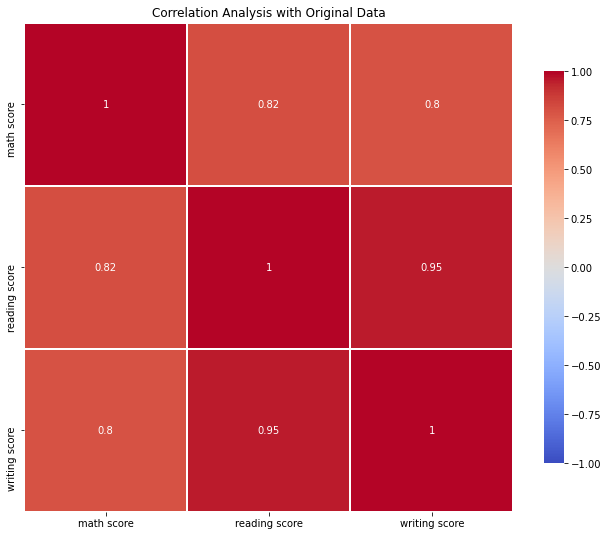

In [6]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Analysis with Original Data')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

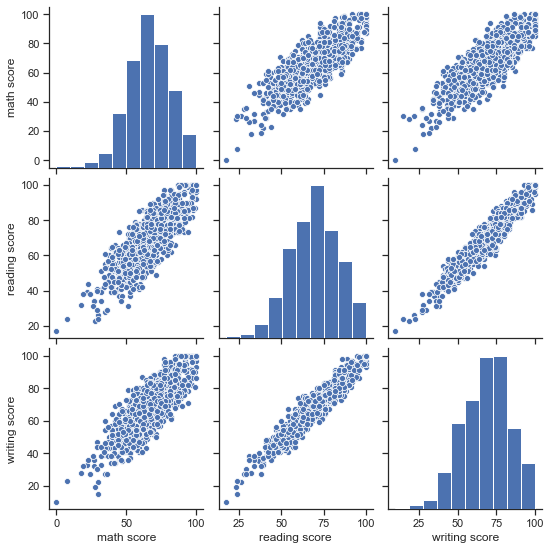

In [7]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

## 2. Correlation encoding categorical variables

Converting to categorical to plot them

In [8]:
data_label_encoding = data.copy()

In [9]:
data_label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data_label_encoding['gender']= data_label_encoding['gender'].astype('category')
data_label_encoding['race/ethnicity']= data_label_encoding['race/ethnicity'].astype('category')
data_label_encoding['parental level of education']= data_label_encoding['parental level of education'].astype('category')
data_label_encoding['lunch']= data_label_encoding['lunch'].astype('category')
data_label_encoding['test preparation course']= data_label_encoding['test preparation course'].astype('category')

In [11]:
data_label_encoding['gender_cat']= data_label_encoding['gender'].cat.codes
data_label_encoding['race/ethnicity_cat']= data_label_encoding['race/ethnicity'].cat.codes
data_label_encoding['parental level of education_cat']= data_label_encoding['parental level of education'].cat.codes
data_label_encoding['lunch_cat']= data_label_encoding['lunch'].cat.codes
data_label_encoding['test preparation course_cat']= data_label_encoding['test preparation course'].cat.codes

In [12]:
data_label_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   gender                           1000 non-null   category
 1   race/ethnicity                   1000 non-null   category
 2   parental level of education      1000 non-null   category
 3   lunch                            1000 non-null   category
 4   test preparation course          1000 non-null   category
 5   math score                       1000 non-null   int64   
 6   reading score                    1000 non-null   int64   
 7   writing score                    1000 non-null   int64   
 8   gender_cat                       1000 non-null   int8    
 9   race/ethnicity_cat               1000 non-null   int8    
 10  parental level of education_cat  1000 non-null   int8    
 11  lunch_cat                        1000 non-null   int8    
 12  test pr

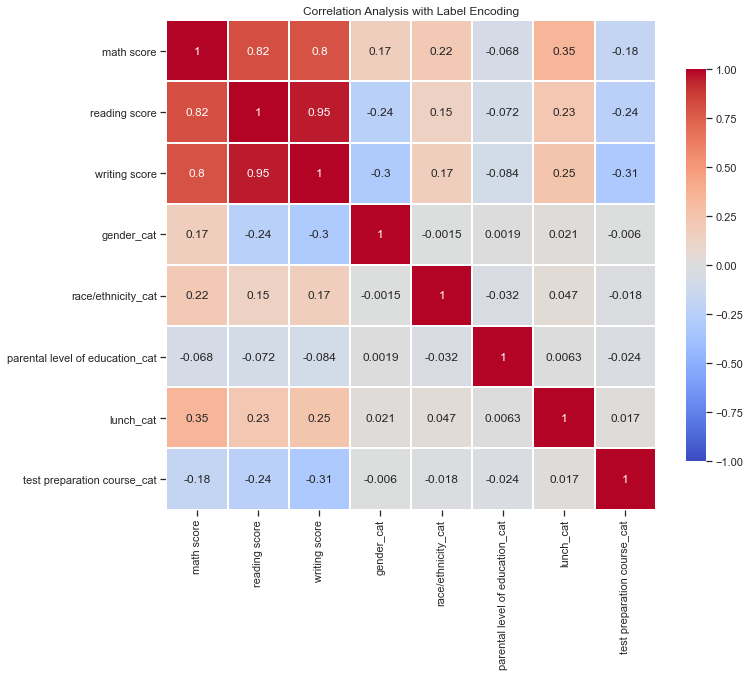

In [13]:
corr_label_encoding = data_label_encoding.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Correlation Analysis with Label Encoding')
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_label_encoding, cmap='coolwarm',center=0, vmin = -1,
            square=True, linewidths=1, cbar_kws={"shrink": .8}, annot = True)

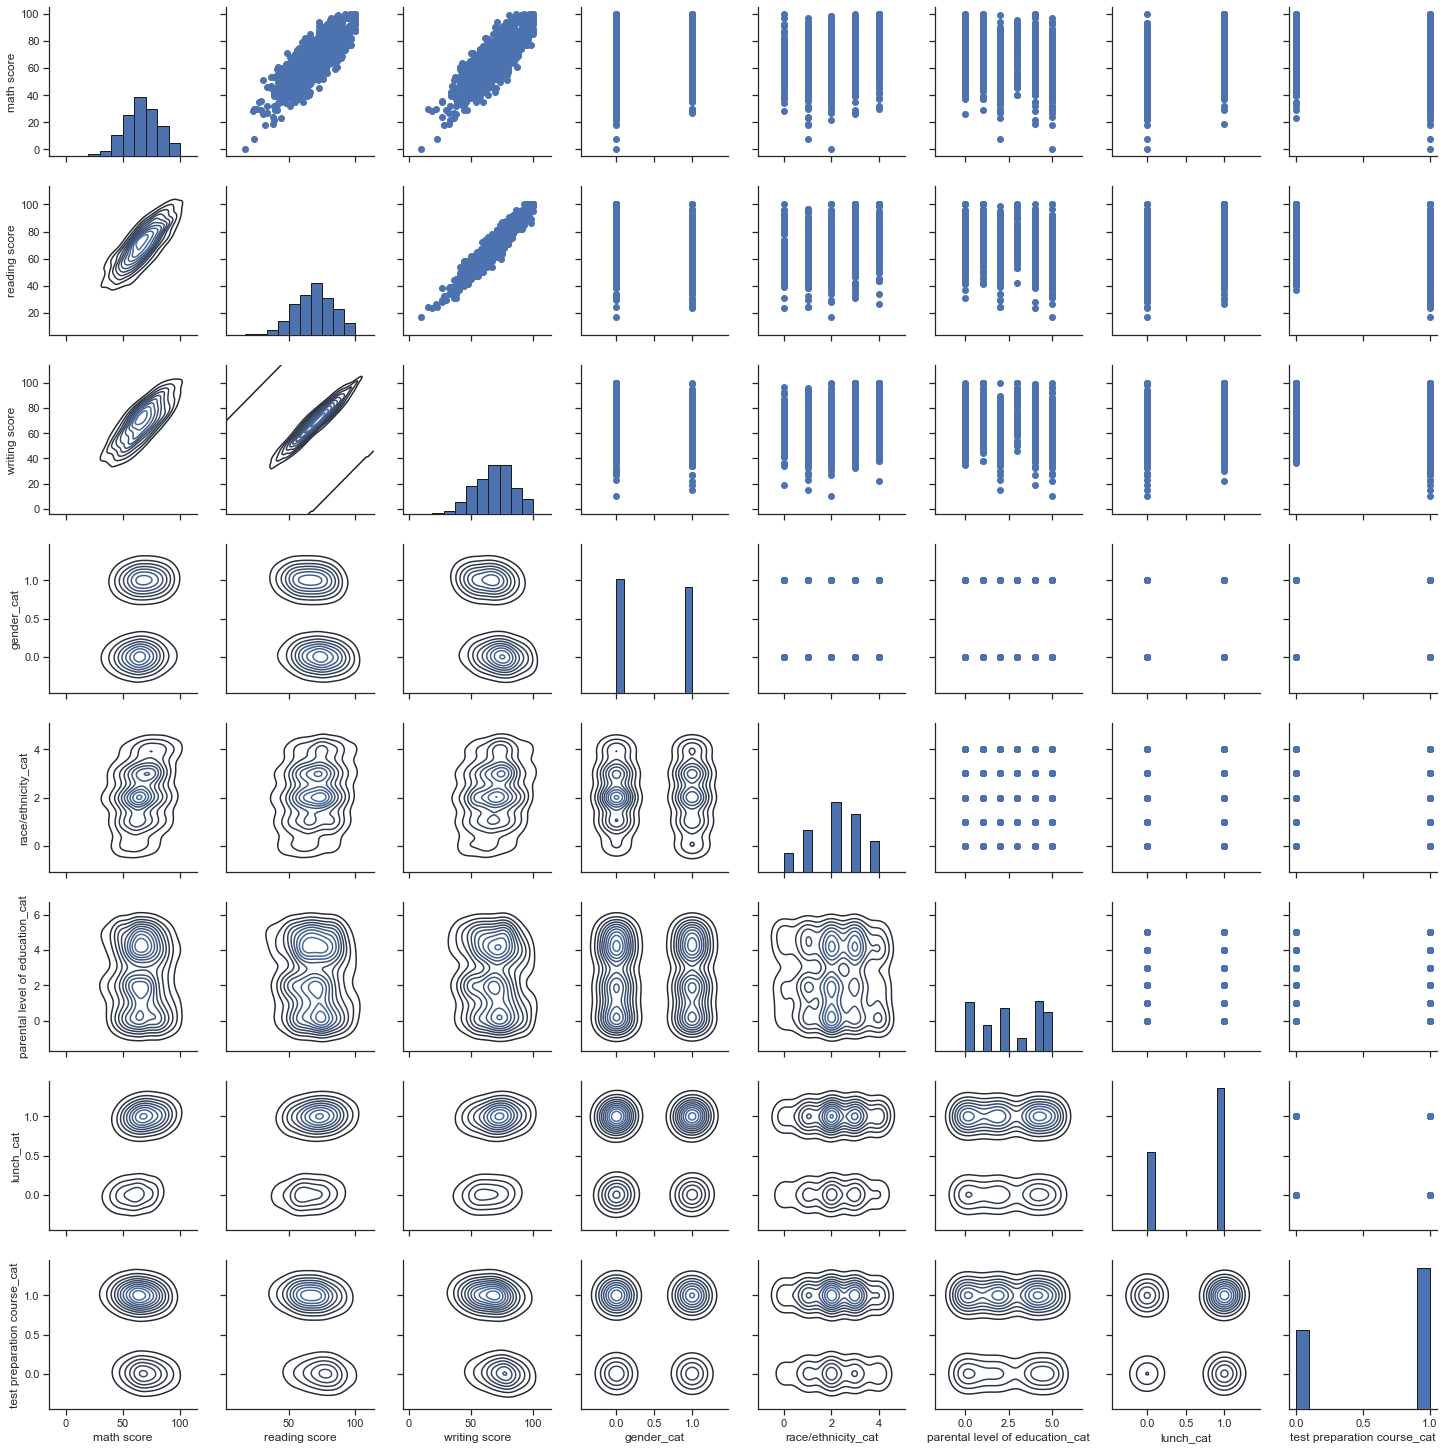

In [14]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= data_label_encoding)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter)

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, 
                     edgecolor = 'k')
# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot)

In [15]:
# Gender ant Test preparation

By looking at 

### 2.1 Study by Gender

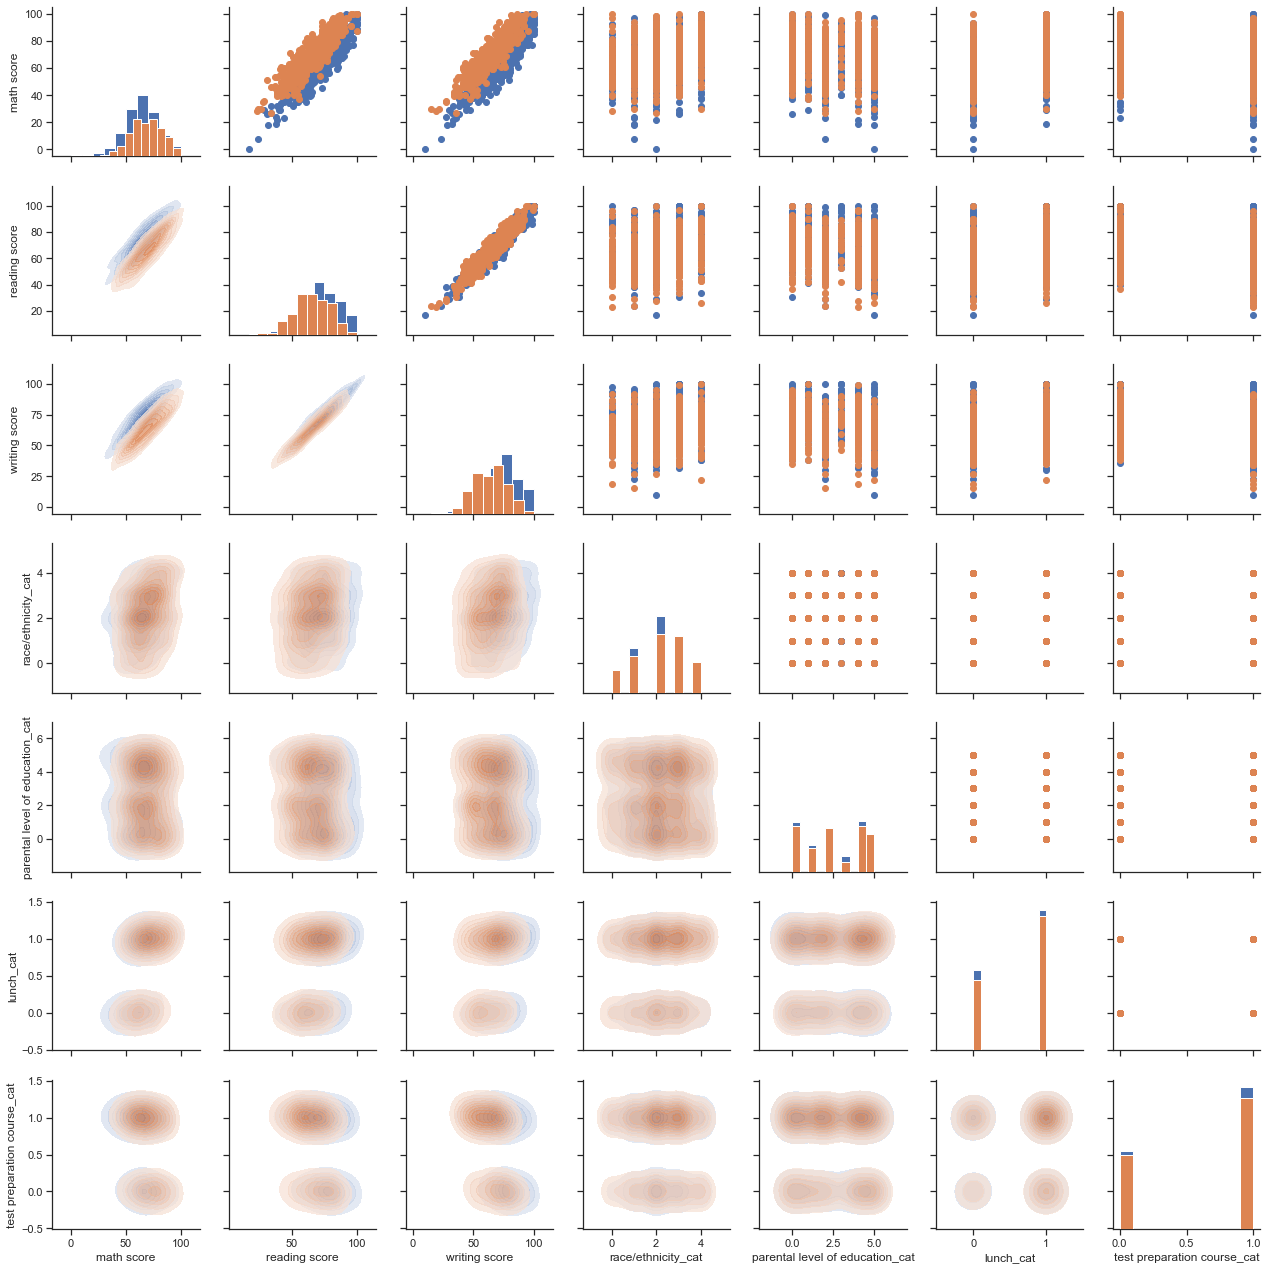

In [39]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= data_label_encoding, hue = 'gender_cat')

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter)

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist)

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha = 0.7)

### 2.1 Study by Test Preparation

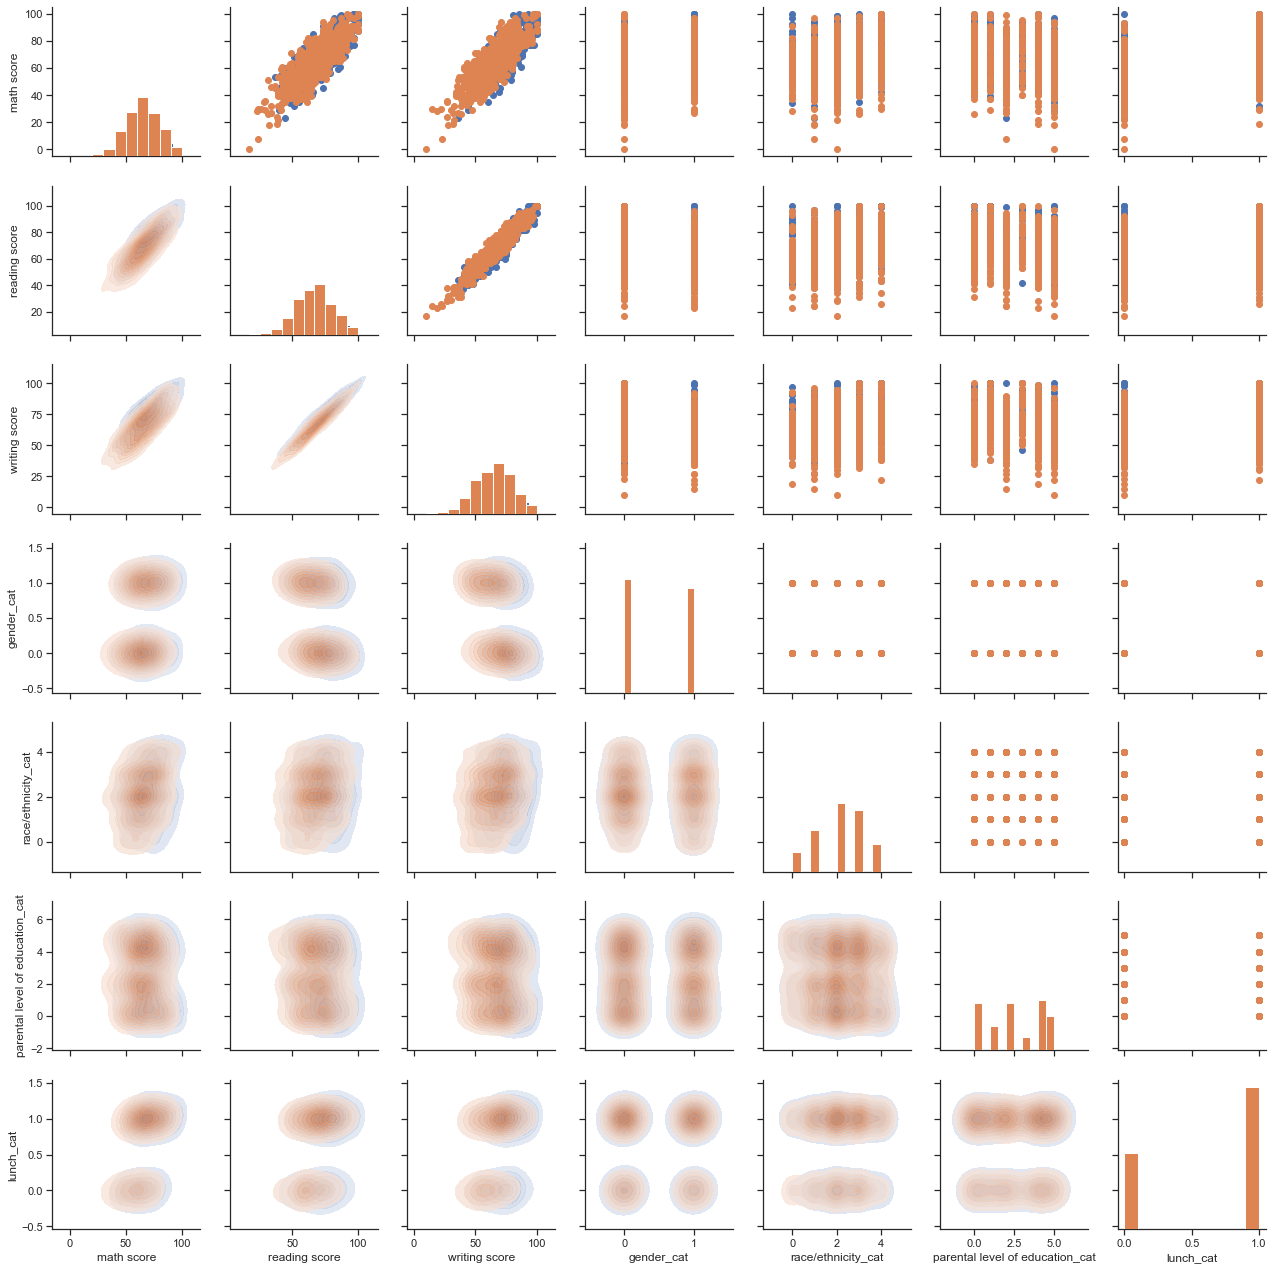

In [45]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= data_label_encoding, hue = 'test preparation course_cat')

# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter)

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist)

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha = 0.7)

## 3. Bonus: Testing PPSCORE package

In [ ]:
# Reorder columns so we have scores in the same order as in section 2 and its easier to compare
data = data[['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']]

In [ ]:
ppmatrix = ppscore.matrix(data)

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Relationship Analysis with PPSCORE')

sns.heatmap(ppmatrix, vmin=-1, vmax=1, cmap="coolwarm", linewidths=1, annot=True, 
            square = True, cbar_kws={"shrink": .8})

In [ ]:
# Gender, lunch and Test preparation

## 4. Conclusions